In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets, preprocessing
from sklearn.decomposition import PCA

data = pd.read_csv('data_3D_printer.csv')

In [191]:
data.head()

layer_height  wall_thickness  infill_density infill_pattern  \
0          0.02               8              90           grid   
1          0.02               7              90      honeycomb   
2          0.02               1              80           grid   
3          0.02               4              70      honeycomb   
4          0.02               6              90           grid   

   nozzle_temperature  bed_temperature  print_speed material  fan_speed  \
0                 220               60           40      abs          0   
1                 225               65           40      abs         25   
2                 230               70           40      abs         50   
3                 240               75           40      abs         75   
4                 250               80           40      abs        100   

   roughness  tension_strength  elongation  
0         25                18         1.2  
1         32                16         1.4  
2         40                 8         0.8  
3         68                10         0.5  
4         92                 5         0.7

In [192]:
data.head()

layer_height  wall_thickness  infill_density infill_pattern  \
0          0.02               8              90           grid   
1          0.02               7              90      honeycomb   
2          0.02               1              80           grid   
3          0.02               4              70      honeycomb   
4          0.02               6              90           grid   

   nozzle_temperature  bed_temperature  print_speed material  fan_speed  \
0                 220               60           40      abs          0   
1                 225               65           40      abs         25   
2                 230               70           40      abs         50   
3                 240               75           40      abs         75   
4                 250               80           40      abs        100   

   roughness  tension_strength  elongation  
0         25                18         1.2  
1         32                16         1.4  
2         40                 8         0.8  
3         68                10         0.5  
4         92                 5         0.7

In [193]:
data.shape

(50, 12)

There are 50 entries having 12 distinct properties each

In [194]:
data.index

RangeIndex(start=0, stop=50, step=1)

In [195]:
columns = list(data.columns)
columns

['layer_height',
 'wall_thickness',
 'infill_density',
 'infill_pattern',
 'nozzle_temperature',
 'bed_temperature',
 'print_speed',
 'material',
 'fan_speed',
 'roughness',
 'tension_strength',
 'elongation']

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strength    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [197]:
cats = list(data.select_dtypes(include=['object']).columns)
print(f'categorical variables: {cats}')

categorical variables: ['infill_pattern', 'material']


Two variables have been recognized as categorical because they are object types.

In [198]:
nums = list(data.select_dtypes(exclude=['object']).columns)
print(f'numerical variables: {nums}')

numerical variables: ['layer_height', 'wall_thickness', 'infill_density', 'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed', 'roughness', 'tension_strength', 'elongation']


In [199]:
data.nunique(axis=0)

layer_height           5
wall_thickness        10
infill_density         9
infill_pattern         2
nozzle_temperature     9
bed_temperature        5
print_speed            3
material               2
fan_speed              5
roughness             44
tension_strength      26
elongation            27
dtype: int64

Looking at the number of unique values for each variable, we can see that print_speed can be considered a categorical variable since there are only 3 unique values, which suggests preset speed settings. Same for layer_height, bed_temperature, and fan_speed with only 5 unique values

In [200]:
cats.extend(['layer_height','bed_temperature','print_speed','fan_speed'])
nums.remove('bed_temperature')
nums.remove('layer_height')
nums.remove('print_speed')
nums.remove('fan_speed')

print(f'categorical variables: {cats}')
print(f'numerical variables: {nums}')

categorical variables: ['infill_pattern', 'material', 'layer_height', 'bed_temperature', 'print_speed', 'fan_speed']
numerical variables: ['wall_thickness', 'infill_density', 'nozzle_temperature', 'roughness', 'tension_strength', 'elongation']


We have assigned the appropriate variables as categorical and removed them from numerical

In [201]:
# lets check for missing data in the dataframe
missing_data = data.isna()
missing_data.head()


layer_height  wall_thickness  infill_density  infill_pattern  \
0         False           False           False           False   
1         False           False           False           False   
2         False           False           False           False   
3         False           False           False           False   
4         False           False           False           False   

   nozzle_temperature  bed_temperature  print_speed  material  fan_speed  \
0               False            False        False     False      False   
1               False            False        False     False      False   
2               False            False        False     False      False   
3               False            False        False     False      False   
4               False            False        False     False      False   

   roughness  tension_strength  elongation  
0      False             False       False  
1      False             False       False  
2      False             False       False  
3      False             False       False  
4      False             False       False

In [202]:
missing_data_columns = data.isna().sum()
missing_data_columns

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strength      0
elongation            0
dtype: int64

In [203]:
missing_data_total = data.isna().sum().sum()
missing_data_total

0

In [204]:
data.isnull().head()

layer_height  wall_thickness  infill_density  infill_pattern  \
0         False           False           False           False   
1         False           False           False           False   
2         False           False           False           False   
3         False           False           False           False   
4         False           False           False           False   

   nozzle_temperature  bed_temperature  print_speed  material  fan_speed  \
0               False            False        False     False      False   
1               False            False        False     False      False   
2               False            False        False     False      False   
3               False            False        False     False      False   
4               False            False        False     False      False   

   roughness  tension_strength  elongation  
0      False             False       False  
1      False             False       False  
2      False             False       False  
3      False             False       False  
4      False             False       False

In [205]:
data.isnull().sum()


layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strength      0
elongation            0
dtype: int64

In [206]:
data.isnull().sum().sum()

0

There is no missing data in the dataset.

In [207]:
# find total duplicate entries and drop them if any
print(f'totalduplicaterows:{data.duplicated().sum()}') 
#dropduplicaterowsifany 
data=data[~data.duplicated()] 
data.shape

totalduplicaterows:0


(50, 12)

There are no duplicates in the data

In [208]:
data.dtypes

layer_height          float64
wall_thickness          int64
infill_density          int64
infill_pattern         object
nozzle_temperature      int64
bed_temperature         int64
print_speed             int64
material               object
fan_speed               int64
roughness               int64
tension_strength        int64
elongation            float64
dtype: object

In [209]:
data.describe()

layer_height  wall_thickness  infill_density  nozzle_temperature  \
count     50.000000       50.000000        50.00000           50.000000   
mean       0.106000        5.220000        53.40000          221.500000   
std        0.064397        2.922747        25.36348           14.820353   
min        0.020000        1.000000        10.00000          200.000000   
25%        0.060000        3.000000        40.00000          210.000000   
50%        0.100000        5.000000        50.00000          220.000000   
75%        0.150000        7.000000        80.00000          230.000000   
max        0.200000       10.000000        90.00000          250.000000   

       bed_temperature  print_speed   fan_speed   roughness  tension_strength  \
count        50.000000      50.0000   50.000000   50.000000         50.000000   
mean         70.000000      64.0000   50.000000  170.580000         20.080000   
std           7.142857      29.6923   35.714286   99.034129          8.925634   
min          60.000000      40.0000    0.000000   21.000000          4.000000   
25%          65.000000      40.0000   25.000000   92.000000         12.000000   
50%          70.000000      60.0000   50.000000  165.500000         19.000000   
75%          75.000000      60.0000   75.000000  239.250000         27.000000   
max          80.000000     120.0000  100.000000  368.000000         37.000000   

       elongation  
count   50.000000  
mean     1.672000  
std      0.788188  
min      0.400000  
25%      1.100000  
50%      1.550000  
75%      2.175000  
max      3.300000

In [210]:
df = pd.concat((data[cats], data[nums]), axis=1)
df.head()

infill_pattern material  layer_height  bed_temperature  print_speed  \
0           grid      abs          0.02               60           40   
1      honeycomb      abs          0.02               65           40   
2           grid      abs          0.02               70           40   
3      honeycomb      abs          0.02               75           40   
4           grid      abs          0.02               80           40   

   fan_speed  wall_thickness  infill_density  nozzle_temperature  roughness  \
0          0               8              90                 220         25   
1         25               7              90                 225         32   
2         50               1              80                 230         40   
3         75               4              70                 240         68   
4        100               6              90                 250         92   

   tension_strength  elongation  
0                18         1.2  
1                16         1.4  
2                 8         0.8  
3                10         0.5  
4                 5         0.7

In [211]:
num_rows, num_cols = df.shape
print('number of entries: ',num_rows)
print('number of features: ',num_cols)

number of entries:  50
number of features:  12


The data preprocessing is complete and the categorical and numerical features have been sorted.  
However, we can also normalize and standardize the numerical features:

### `Normalization` (min-max)

In [212]:
mx = '_mxm'
nums_mxm = []
for s in nums:
    s = s + mx
    nums_mxm.append(s)
print(nums_mxm)

['wall_thickness_mxm', 'infill_density_mxm', 'nozzle_temperature_mxm', 'roughness_mxm', 'tension_strength_mxm', 'elongation_mxm']


In [213]:
mxm_Scaler = preprocessing.MinMaxScaler()

mxm_Scaler.fit(df[nums])

df[nums_mxm] = mxm_Scaler.transform(df[nums])
df.head()

infill_pattern material  layer_height  bed_temperature  print_speed  \
0           grid      abs          0.02               60           40   
1      honeycomb      abs          0.02               65           40   
2           grid      abs          0.02               70           40   
3      honeycomb      abs          0.02               75           40   
4           grid      abs          0.02               80           40   

   fan_speed  wall_thickness  infill_density  nozzle_temperature  roughness  \
0          0               8              90                 220         25   
1         25               7              90                 225         32   
2         50               1              80                 230         40   
3         75               4              70                 240         68   
4        100               6              90                 250         92   

   tension_strength  elongation  wall_thickness_mxm  infill_density_mxm  \
0                18         1.2            0.777778               1.000   
1                16         1.4            0.666667               1.000   
2                 8         0.8            0.000000               0.875   
3                10         0.5            0.333333               0.750   
4                 5         0.7            0.555556               1.000   

   nozzle_temperature_mxm  roughness_mxm  tension_strength_mxm  elongation_mxm  
0                     0.4       0.011527              0.424242        0.275862  
1                     0.5       0.031700              0.363636        0.344828  
2                     0.6       0.054755              0.121212        0.137931  
3                     0.8       0.135447              0.181818        0.034483  
4                     1.0       0.204611              0.030303        0.103448

<Axes: ylabel='Frequency'>

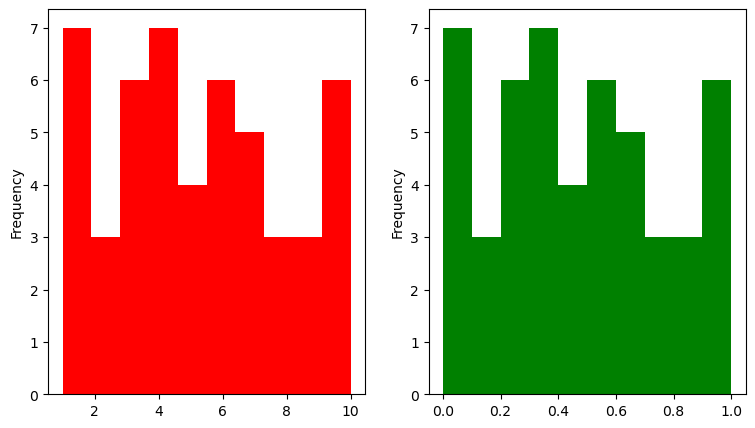

In [214]:
fig1, ax10 = plt.subplots(1,2, figsize=(9,5))

df['wall_thickness'].plot(kind='hist', ax=ax10[0], color='r')
df['wall_thickness_mxm'].plot(kind='hist', ax=ax10[1], color='g')

we can see the min and max has changed to 0 and 1 respectively

### `Standardization`

In [215]:
sc = '_std'
nums_std = []
for s in nums:
    s = s + sc
    nums_std.append(s)
print(nums_std)

['wall_thickness_std', 'infill_density_std', 'nozzle_temperature_std', 'roughness_std', 'tension_strength_std', 'elongation_std']


In [216]:
std_Scaler = preprocessing.StandardScaler()

std_Scaler.fit(df[nums])

df[nums_std] = std_Scaler.transform(df[nums])
df.head()

infill_pattern material  layer_height  bed_temperature  print_speed  \
0           grid      abs          0.02               60           40   
1      honeycomb      abs          0.02               65           40   
2           grid      abs          0.02               70           40   
3      honeycomb      abs          0.02               75           40   
4           grid      abs          0.02               80           40   

   fan_speed  wall_thickness  infill_density  nozzle_temperature  roughness  \
0          0               8              90                 220         25   
1         25               7              90                 225         32   
2         50               1              80                 230         40   
3         75               4              70                 240         68   
4        100               6              90                 250         92   

   ...  nozzle_temperature_mxm  roughness_mxm  tension_strength_mxm  \
0  ...                     0.4       0.011527              0.424242   
1  ...                     0.5       0.031700              0.363636   
2  ...                     0.6       0.054755              0.121212   
3  ...                     0.8       0.135447              0.181818   
4  ...                     1.0       0.204611              0.030303   

   elongation_mxm  wall_thickness_std  infill_density_std  \
0        0.275862            0.960817            1.457670   
1        0.344828            0.615199            1.457670   
2        0.137931           -1.458506            1.059399   
3        0.034483           -0.421653            0.661129   
4        0.103448            0.269582            1.457670   

   nozzle_temperature_std  roughness_std  tension_strength_std  elongation_std  
0               -0.102240      -1.484923             -0.235403       -0.604921  
1                0.238559      -1.413522             -0.461751       -0.348599  
2                0.579358      -1.331922             -1.367146       -1.117567  
3                1.260957      -1.046321             -1.140797       -1.502051  
4                1.942555      -0.801520             -1.706669       -1.245728  

[5 rows x 24 columns]

<Axes: ylabel='Frequency'>

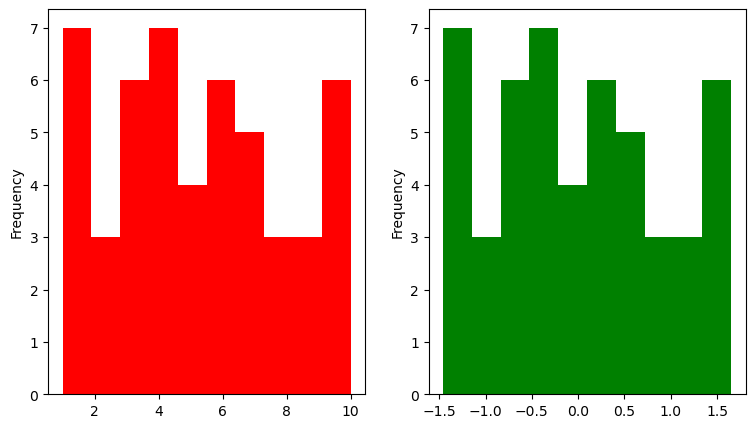

In [217]:
fig2, ax20 = plt.subplots(1,2, figsize=(9,5))

df['wall_thickness'].plot(kind='hist', ax=ax20[0], color='r')
df['wall_thickness_std'].plot(kind='hist', ax=ax20[1], color='g')

In [218]:
df.wall_thickness_std.describe()

count    5.000000e+01
mean     7.549517e-17
std      1.010153e+00
min     -1.458506e+00
25%     -7.672709e-01
50%     -7.603586e-02
75%      6.151992e-01
max      1.652052e+00
Name: wall_thickness_std, dtype: float64

### `Visualization`

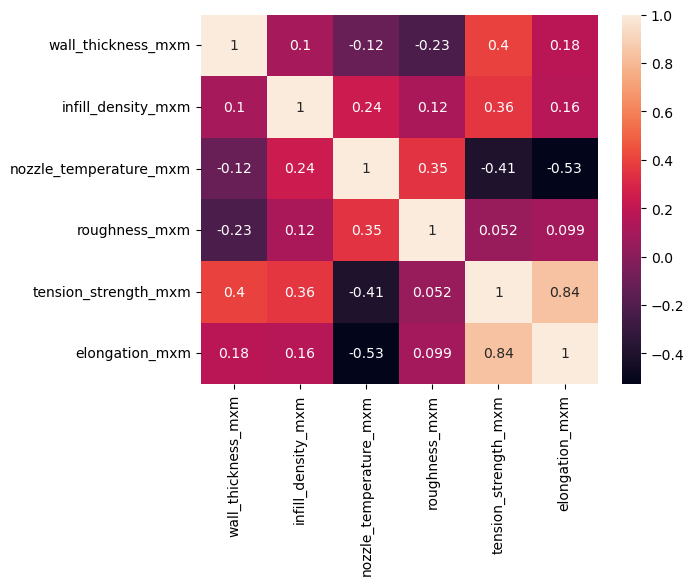

In [219]:
hm1 = sns.heatmap(df[nums_mxm].corr(), annot=True)

From this heatmap, we can see that tension_strength and elongation have the greatest relation, followed by nozzle_temperature and elongation, then nozzle_temperature and tensile_streght with a negative relation. 

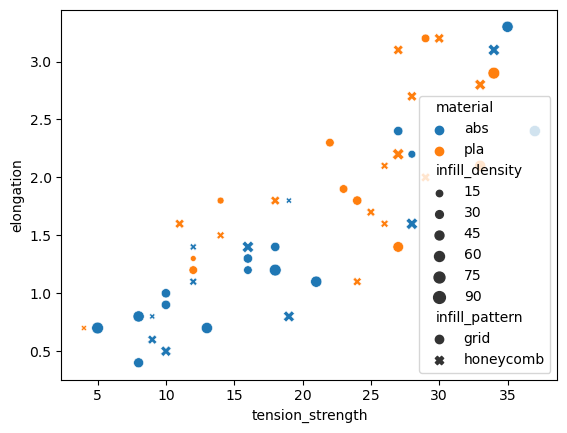

In [220]:
sp1 = sns.scatterplot(data=df, x='tension_strength', y='elongation', hue='material', style = 'infill_pattern', size = 'infill_density')

It can be seen that as tension_strength increases, elongation increases too. There is no clear cluster between material, infill_pattern or infill_density

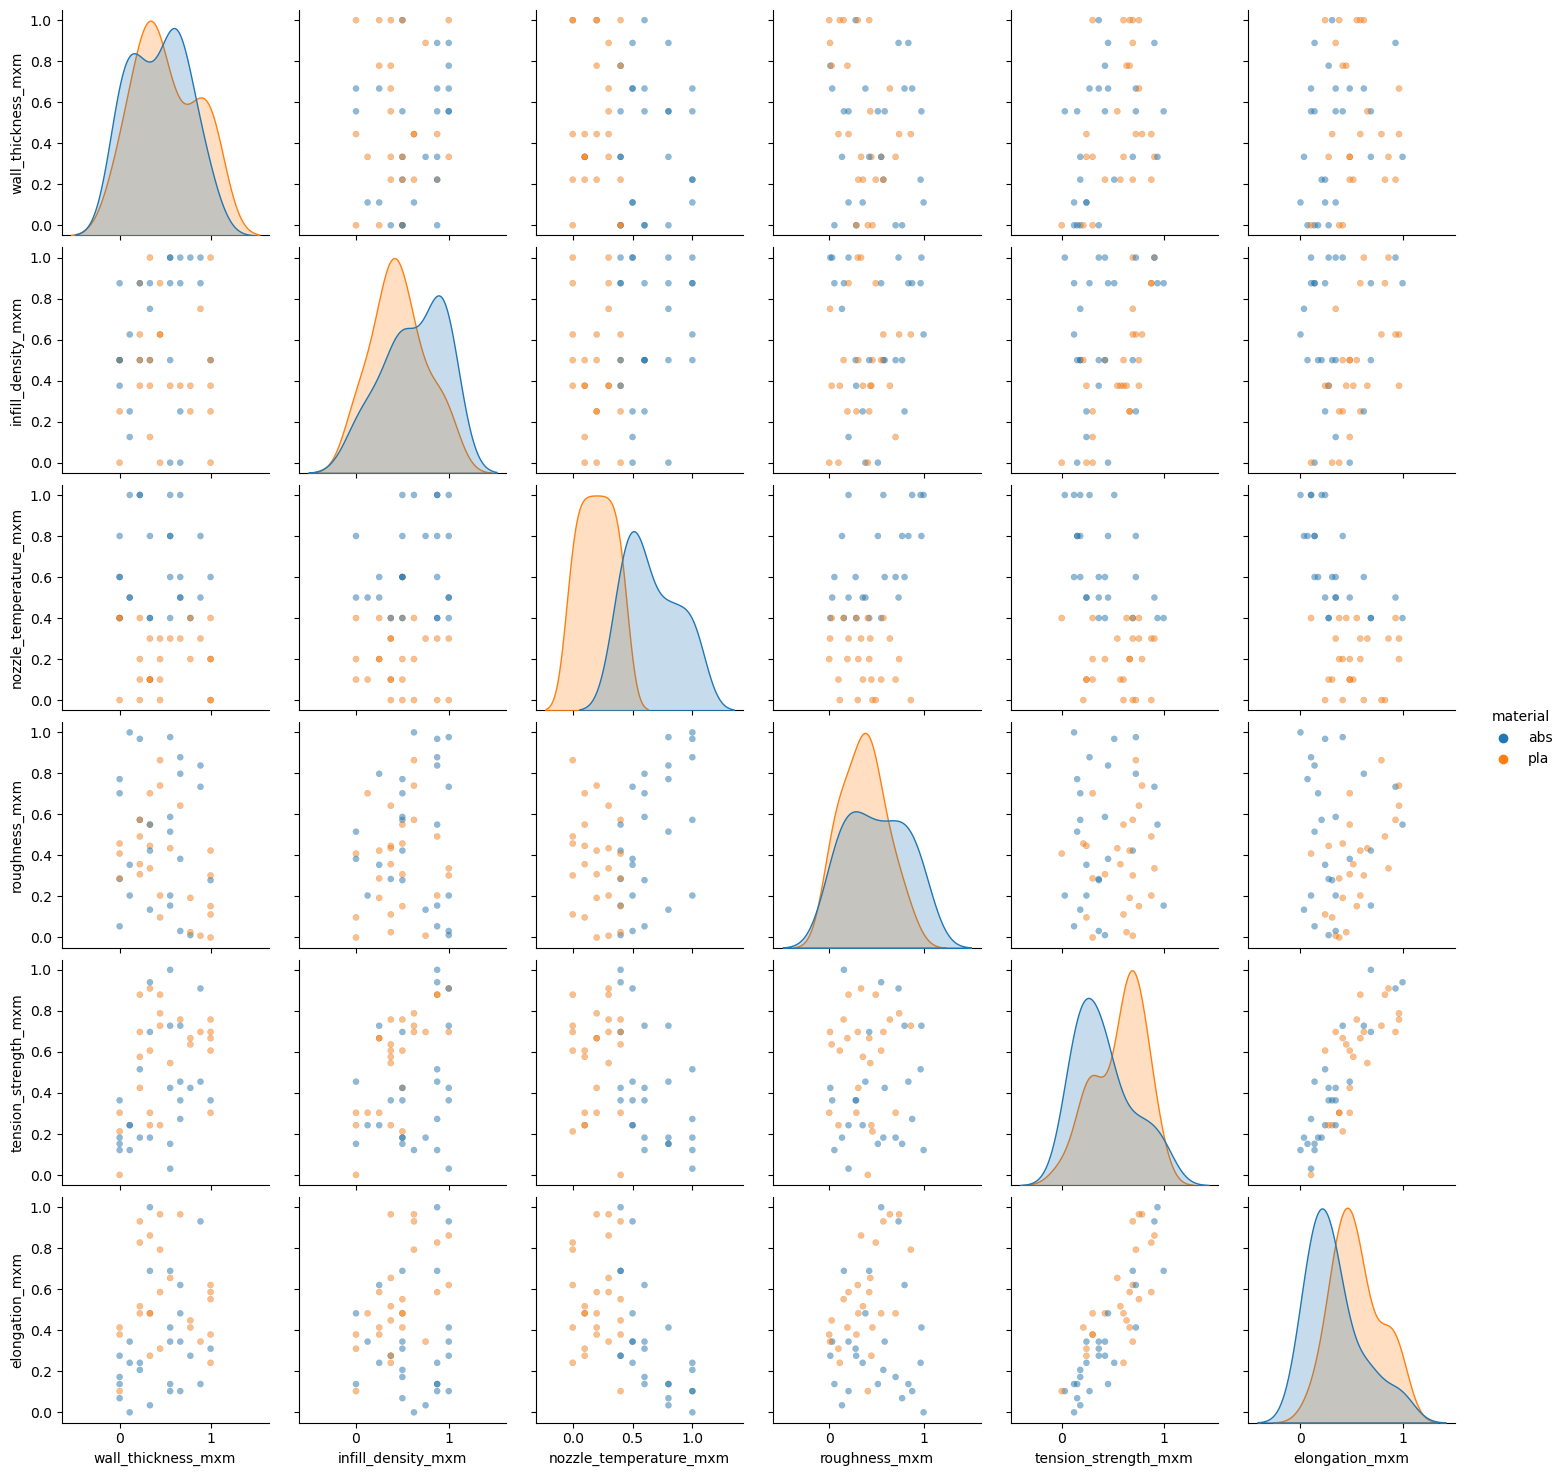

In [221]:
pp1 = sns.pairplot(data=df, vars = df[nums_mxm], diag_kind='kde', hue ='material', 
                   plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(fill=True))

There are some clusters noticed for the nozzle_temperature plots. This shows that pla prints with a lower temperature than abs.

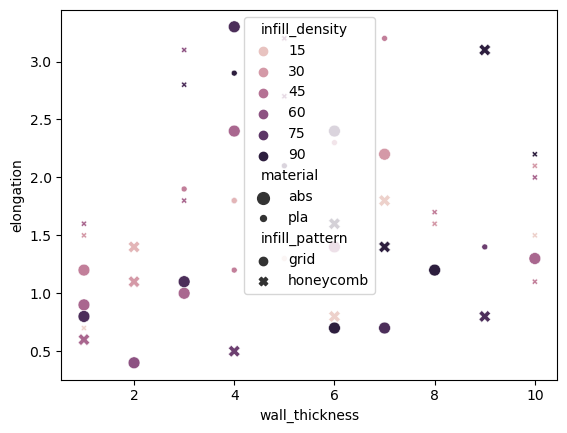

In [222]:
sp1 = sns.scatterplot(data=df, x='wall_thickness', y='elongation', size ='material', style = 'infill_pattern', hue = 'infill_density')

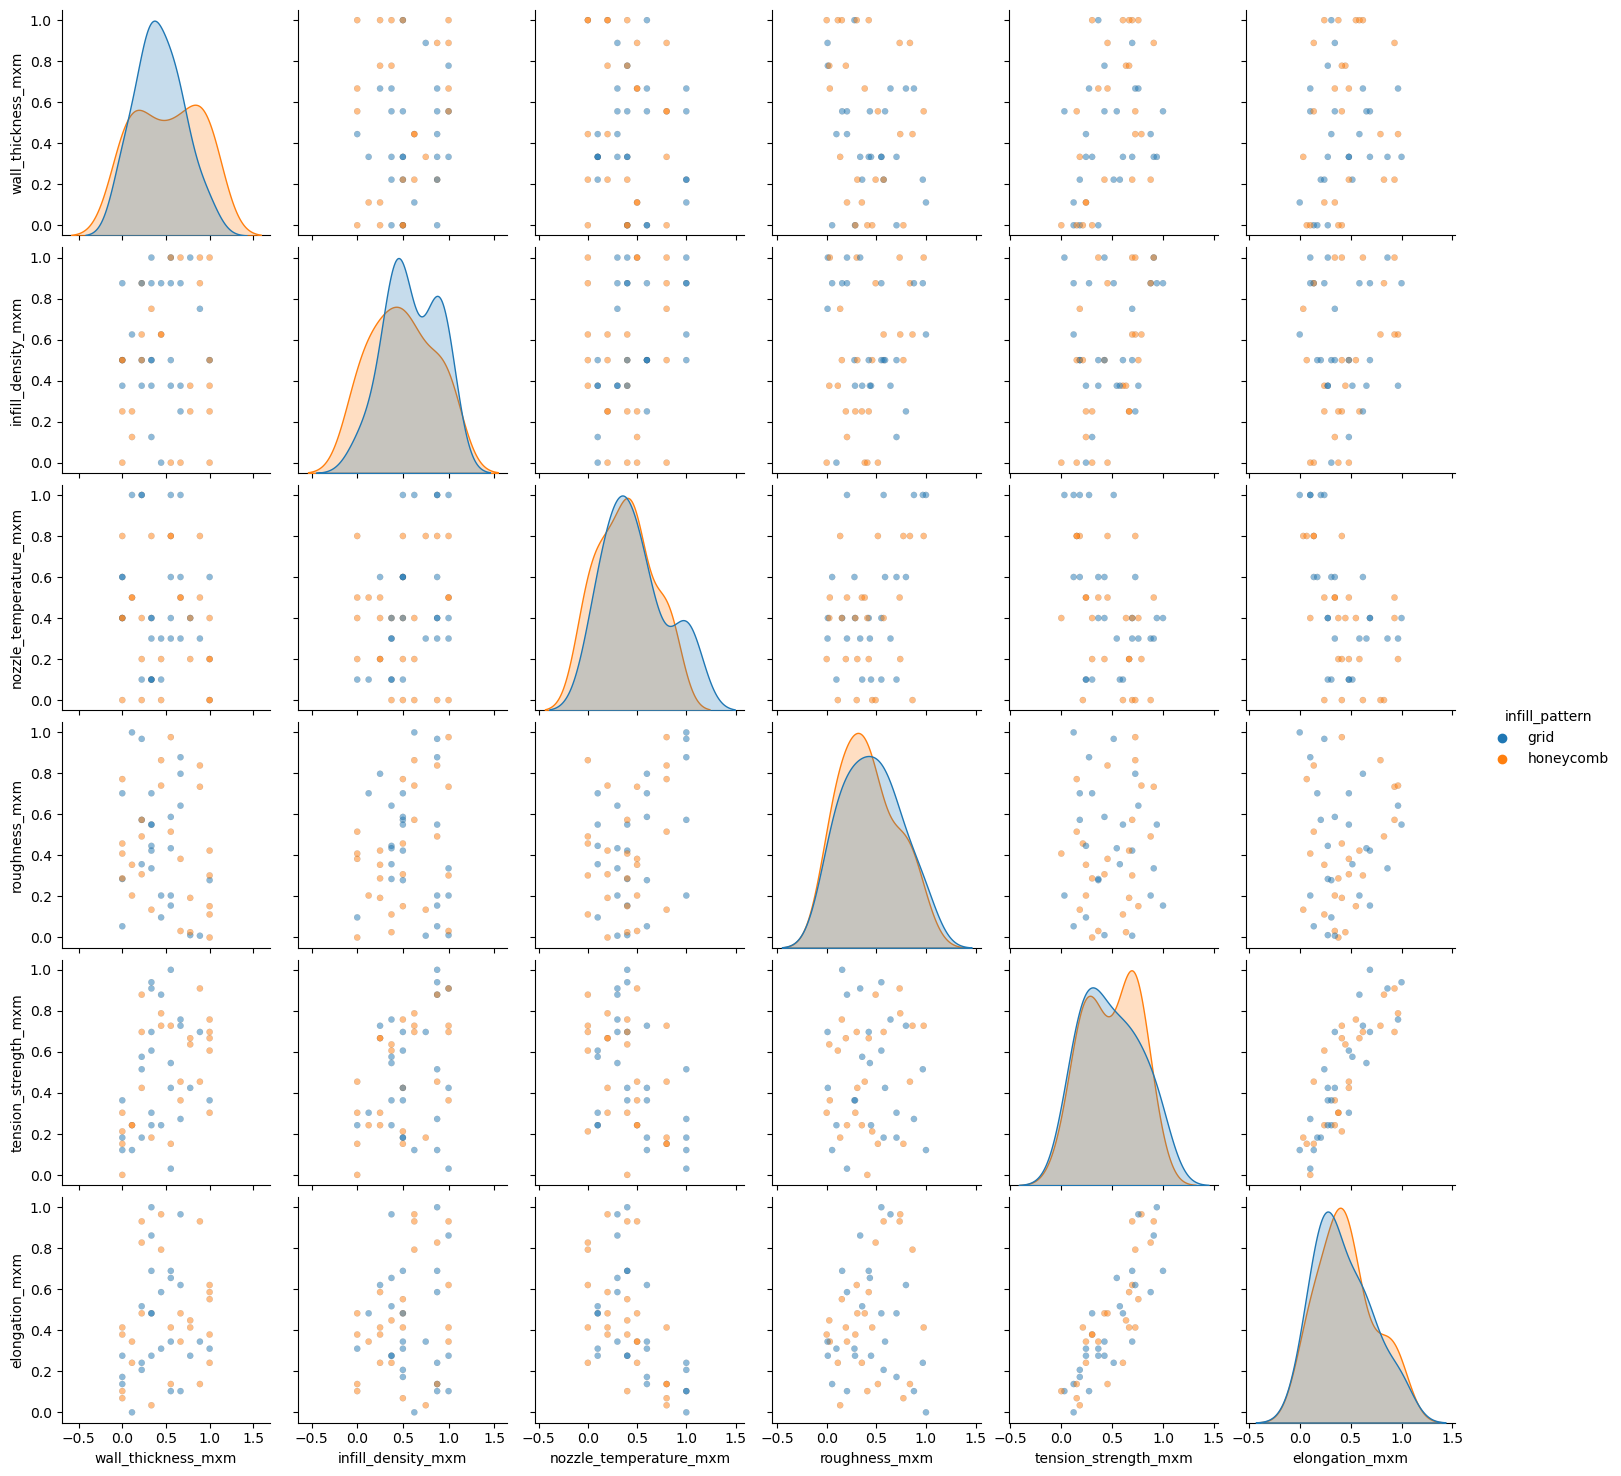

In [223]:
pp2 = sns.pairplot(data=df, vars = df[nums_mxm], diag_kind='kde', hue ='infill_pattern', 
             plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(fill=True))

In [224]:
df2 = df[nums].copy()
df2.head()

wall_thickness  infill_density  nozzle_temperature  roughness  \
0               8              90                 220         25   
1               7              90                 225         32   
2               1              80                 230         40   
3               4              70                 240         68   
4               6              90                 250         92   

   tension_strength  elongation  
0                18         1.2  
1                16         1.4  
2                 8         0.8  
3                10         0.5  
4                 5         0.7

In [225]:
df2['print_speed'] = df.print_speed
df2.head()

wall_thickness  infill_density  nozzle_temperature  roughness  \
0               8              90                 220         25   
1               7              90                 225         32   
2               1              80                 230         40   
3               4              70                 240         68   
4               6              90                 250         92   

   tension_strength  elongation  print_speed  
0                18         1.2           40  
1                16         1.4           40  
2                 8         0.8           40  
3                10         0.5           40  
4                 5         0.7           40

<Axes: >

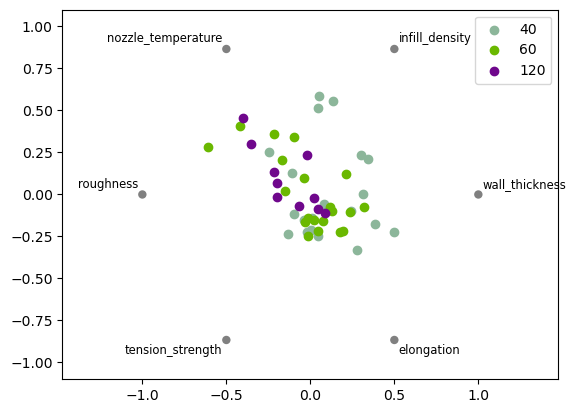

In [226]:
pd.plotting.radviz(df2, 'print_speed')

### `Check how many of cat types in our data set`  
(Makes sure no bias in next box plots)

<Axes: xlabel='material', ylabel='count'>

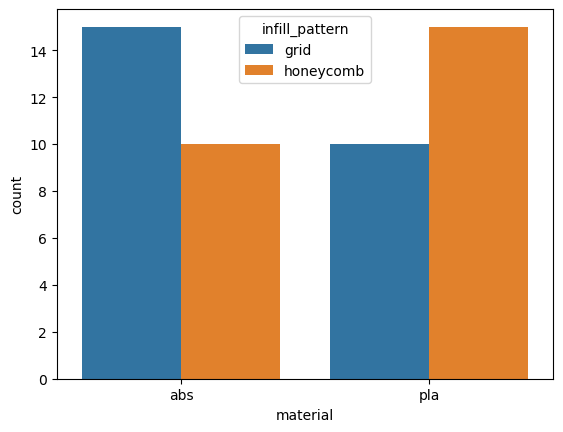

In [227]:
sns.countplot(data=df, x='material', hue='infill_pattern')

no overbearing bias in the data set

### `Elongation, Tension Strength, and Print Speed based on material and infill pattern` (box plots)

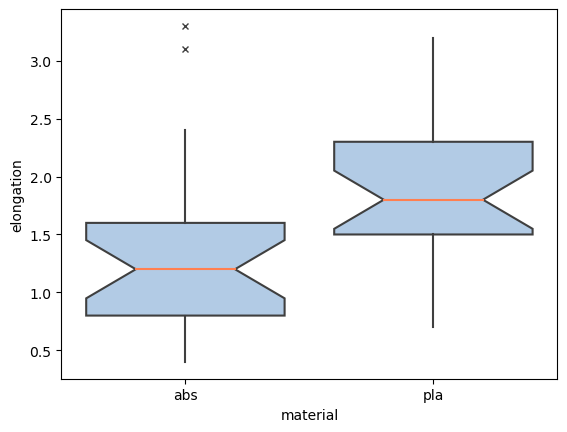

In [228]:
bp1 = sns.boxplot(data=df, x= 'material', y='elongation', 
                  notch=True, showcaps=False, flierprops={"marker": "x"},
                  boxprops={"facecolor": (.4, .6, .8, .5)},
                  medianprops={"color": "coral"}
                 )

pla seems to have higher elongation

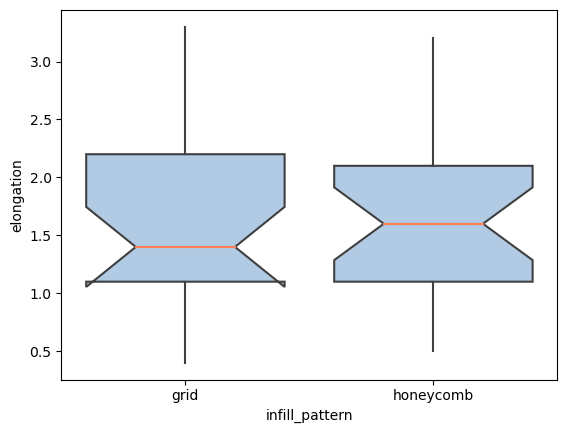

In [229]:
bp2 = sns.boxplot(data=df, x= 'infill_pattern', y='elongation', 
                  notch=True, showcaps=False, flierprops={"marker": "x"},
                  boxprops={"facecolor": (.4, .6, .8, .5)},
                  medianprops={"color": "coral"}
                 ) 

infill pattern has no noticable effect on elongation

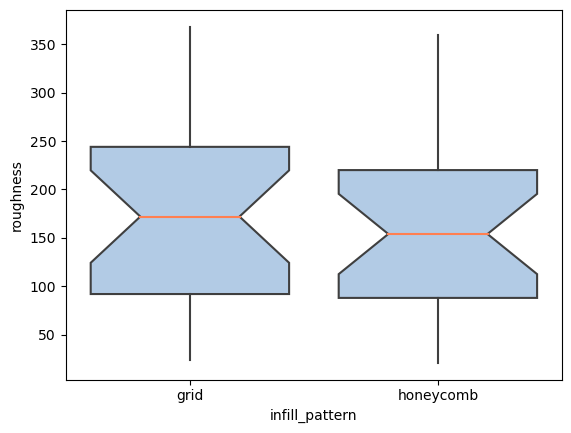

In [230]:
bp3 = sns.boxplot(data=df, x='infill_pattern', y='roughness', 
                  notch=True, showcaps=False, flierprops={"marker": "x"},
                  boxprops={"facecolor": (.4, .6, .8, .5)},
                  medianprops={"color": "coral"}
                 )

infill pattern has no noticable effect on roughness

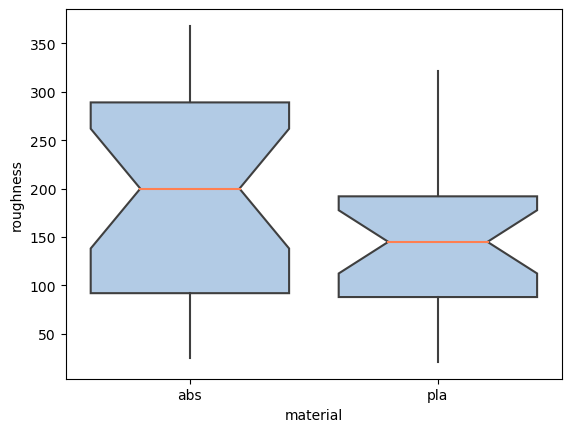

In [231]:
bp4 = sns.boxplot(data=df, x='material', y='roughness', 
                  notch=True, showcaps=False, flierprops={"marker": "x"},
                  boxprops={"facecolor": (.4, .6, .8, .5)},
                  medianprops={"color": "coral"}
                 )

abs has higher roughness than pla

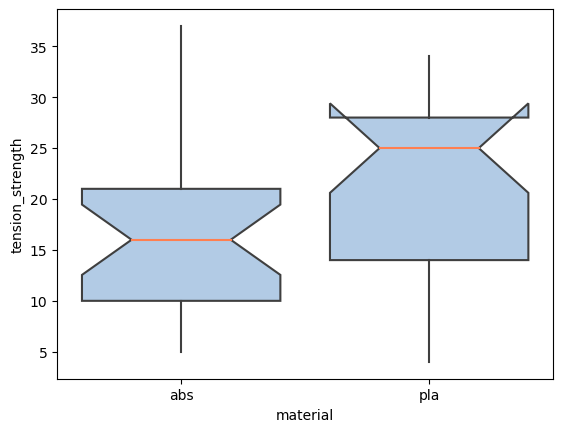

In [232]:
bp5 = sns.boxplot(data=df, x='material', y='tension_strength', 
                  notch=True, showcaps=False, flierprops={"marker": "x"},
                  boxprops={"facecolor": (.4, .6, .8, .5)},
                  medianprops={"color": "coral"}
                 )

pla ha a higher tension strength than abs

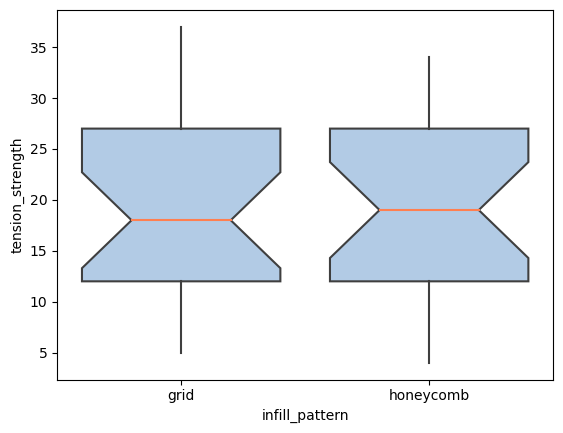

In [233]:
bp5 = sns.boxplot(data=df, x='infill_pattern', y='tension_strength', 
                  notch=True, showcaps=False, flierprops={"marker": "x"},
                  boxprops={"facecolor": (.4, .6, .8, .5)},
                  medianprops={"color": "coral"}
                 )

infill pattern has no noticable effect on tension strength

Overall, many different insights can be gained by rearranging and plotting the data in various ways.